## Topic analysis

Using litstudy

In [118]:
# Import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

# Import other libraries
import os
import sys

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy

/usr/local/lib/python3.6/dist-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)
/usr/local/lib/python3.6/dist-packages/paramiko/transport.py:33: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography and will be removed in a future release.
  from cryptography.hazmat.backends import default_backend


In [86]:
# Load the RIS files - not working
#docs_review_scopus = litstudy.load_ris_file('bulk_data/review_scopus_simple.ris')
#docs_review_wos = litstudy.load_ris_file('bulk_data/review_wos.ris')

Exception: invalid RIS line: BACKGROUND: Resilience in healthcare professionals has gained increasing attention globally, yet to date resilience and resilience education in nursing and midwifery students remain largely under-researched.

In [119]:
scopus_search = 'TITLE-ABS-KEY(metric OR measure* OR quant* OR indicat*) AND TITLE(resilience) AND PUBYEAR > 2010 AND DOCTYPE(re)'
docs_review_scopus = litstudy.search_scopus(scopus_search)

100%|██████████| 685/685 [00:12<00:00, 55.17it/s] 


In [89]:
len(docs_review_scopus)

685

<AxesSubplot:title={'center':'Year of publications'}, xlabel='No. of documents'>

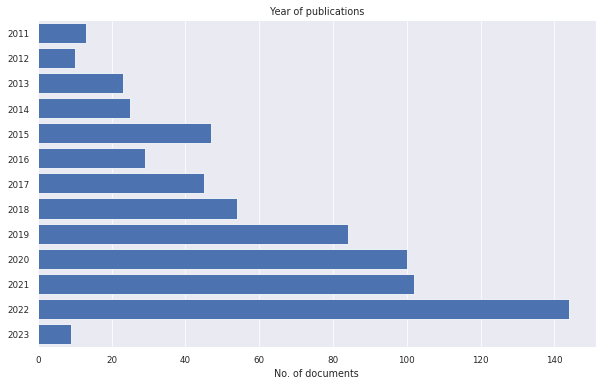

In [95]:
litstudy.plot_year_histogram(docs_review_scopus)

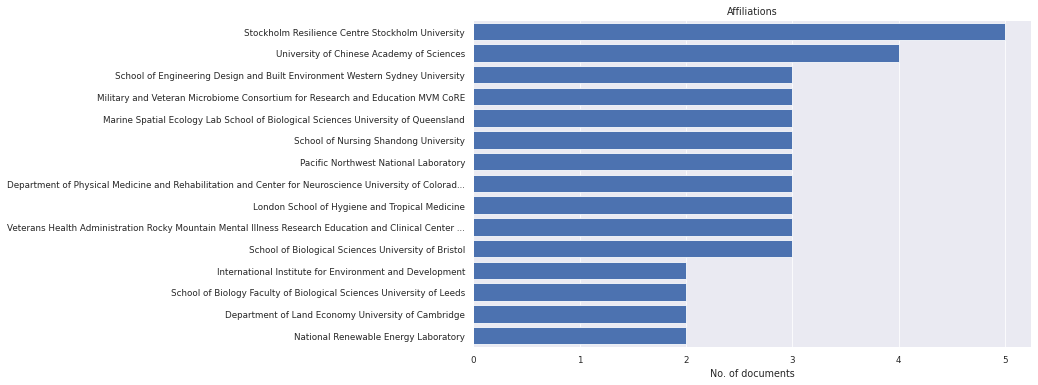

In [96]:
litstudy.plot_affiliation_histogram(docs_review_scopus, limit=15)

<AxesSubplot:title={'center':'Authors'}, xlabel='No. of documents'>

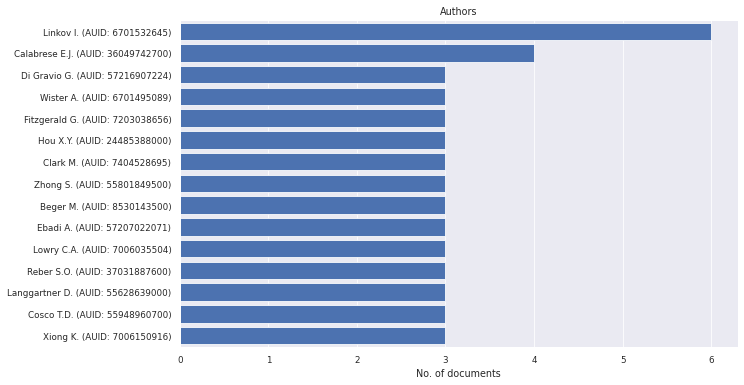

In [208]:
litstudy.plot_author_histogram(docs_review_scopus, limit=15)

<AxesSubplot:title={'center':'No. of authors'}, xlabel='No. of documents'>

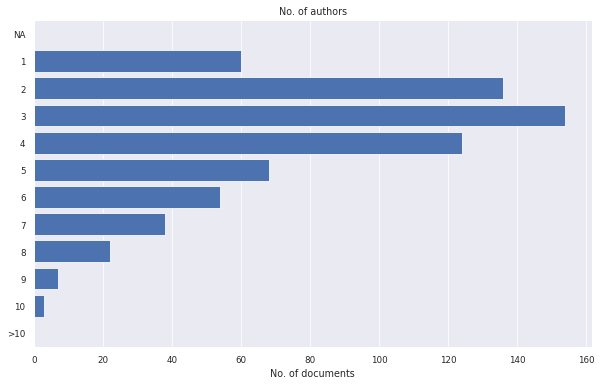

In [100]:
litstudy.plot_number_authors_histogram(docs_review_scopus)

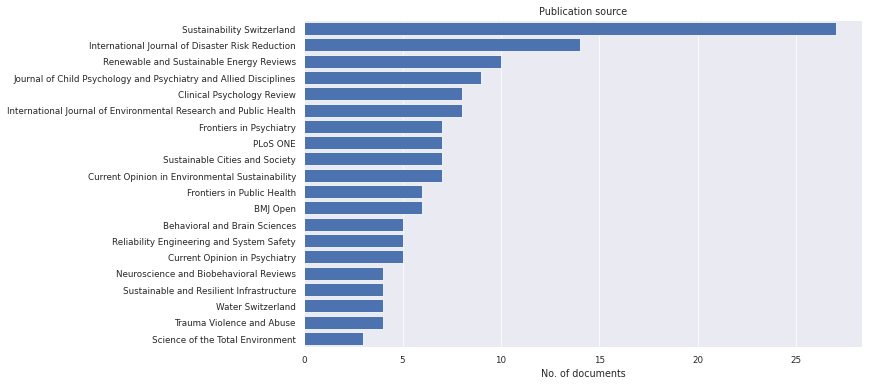

In [109]:
litstudy.plot_source_histogram(docs_review_scopus, limit=20);

In [141]:
docs = docs_review_scopus.filter_docs(lambda d: d.publication_source == 'Ecology and Society')
len(docs)

2

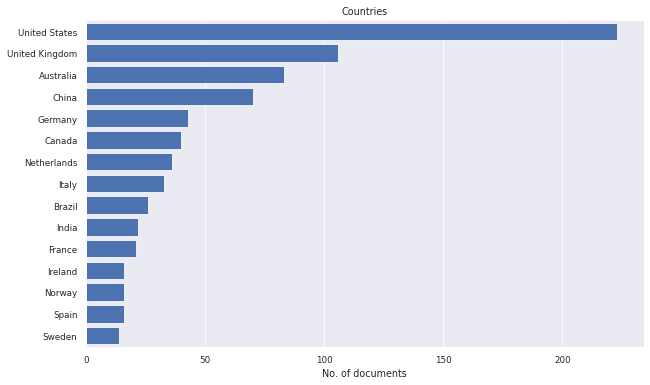

In [143]:
litstudy.plot_country_histogram(docs_review_scopus, limit=15);

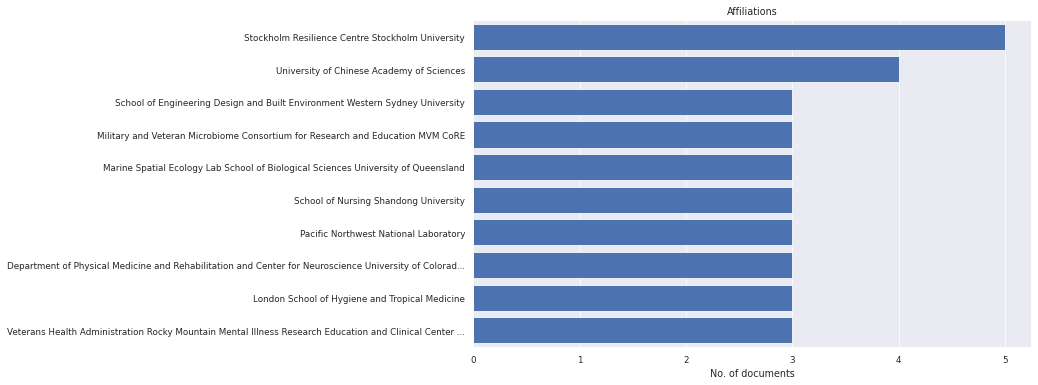

In [160]:
litstudy.plot.plot_affiliation_histogram(docs_review_scopus, limit=10);

In [145]:
# Co-citation network
# papers are nodes and edges represent pairs of documents that have been cited together 
# simulatenously by other papers
# size probably degree

litstudy.plot_cocitation_network(docs_review_scopus, max_edges=500)

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [213]:
# Coupling network
# This strength measures how similar two documents view related work. 
# It is measured as the number of shared references between two documents.

litstudy.network.plot_coupling_network(docs_review_scopus, max_edges=700, node_size=20)

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [217]:
# Coauthor network
# node authors and edge weight indicate the number of shared publications between two authors

litstudy.network.plot_coauthor_network(docs_review_scopus, max_authors=10000)

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [148]:
#remove_words = ['mdpi', 'measures', 'indicators', 'literature', 'assessment', 
#                'authors', 'review', 'index', 'wiley']
corpus = litstudy.build_corpus(docs_review_scopus, ngram_threshold=0.8) #, remove_words=remove_words)

In [149]:
litstudy.compute_word_distribution(corpus).filter(like='_', axis=0).head(10)

,count
climate_change,84
rights_reserved,63
long_term,50
web_science,41
basel_switzerland,35
licensee_mdpi,35
decision_making,32
john_wiley,29
state_art,24
electronic_databases,23


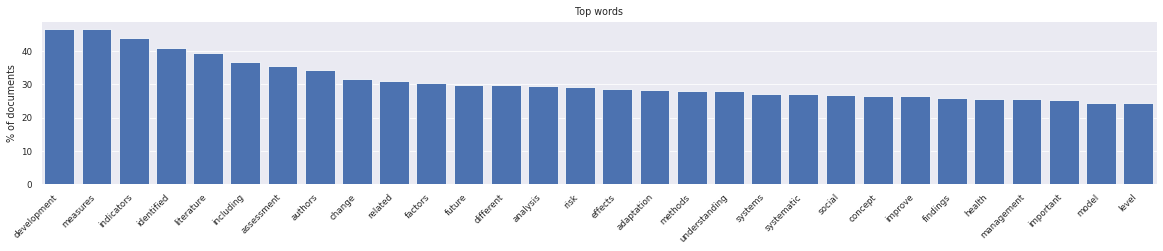

In [150]:
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, limit=30, title="Top words", vertical=True, label_rotation=45);

In [157]:
num_topics = 10
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=500)

Topic 1: ['cancer', 'patients', 'nursing', 'care', 'adults']
Topic 2: ['stress', 'brain', 'disorders', 'disease', 'mechanisms']
Topic 3: ['ecosystem', 'climate', 'ecological', 'change', 'forests']
Topic 4: ['urban', 'cities', 'green', 'planning', 'flood']
Topic 5: ['food', 'interventions', 'security', 'school', 'programs']
Topic 6: ['children', 'health', 'mental', 'adolescents', 'family']
Topic 7: ['power', 'grid', 'energy', 'plant', 'crop']
Topic 8: ['pandemic', 'covid', 'care', 'health', 'caregivers']
Topic 9: ['chain', 'supply', 'supply_chain', 'disruptions', 'literature']
Topic 10: ['disaster', 'community', 'framework', 'infrastructure', 'hazards']


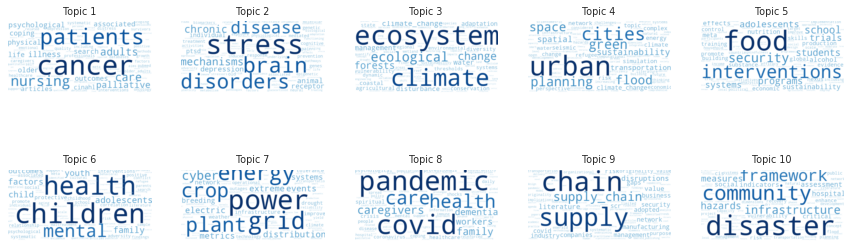

In [158]:
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5);

# psychology: 2, 5, 6

# ecology: 1

# disaster: 3

# urban: 8
# supply chain: 7
# energy: 4

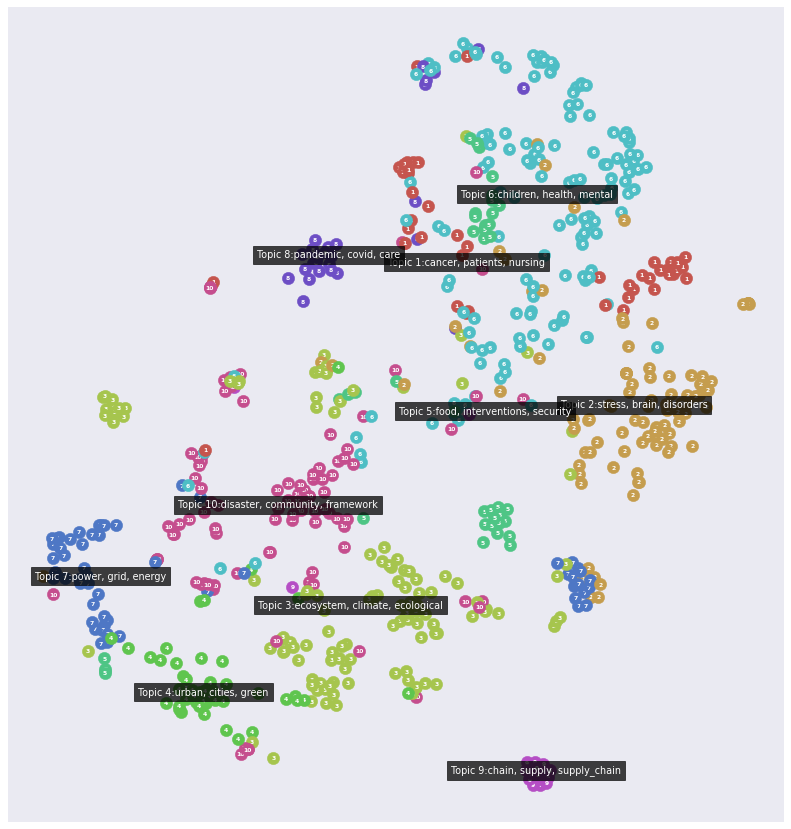

In [159]:
# Nodes are papers
# Close papers are placed together

plt.figure(figsize=(20, 15))
litstudy.plot_embedding(corpus, topic_model);

In [222]:
topic_id = topic_model.best_topic_for_token('climate')

In [206]:
#num_topics = 9
#topic_model = litstudy.nlp.train_lda_model(corpus, num_topics)

In [230]:
for topic_id in range(0,num_topics):
    print(f"\nTOPIC {topic_id}")
    for doc_id in topic_model.best_documents_for_topic(topic_id, limit=5):
        print(docs_review_scopus[int(doc_id)].title)


TOPIC 0
Perspectives for ecosystem management based on ecosystem resilience and ecological thresholds against multiple and stochastic disturbances
The carbon isotopic signature of C4 crops and its applicability in breeding for climate resilience
Advances in cereal crop genomics for resilience under climate change
Integrating resilience with functional ecosystem measures: A novel paradigm for management decisions under multiple-stressor interplay in freshwater ecosystems
Shifting currents: Managing freshwater systems for ecological resilience in a changing climate

TOPIC 1
Resilience in cancer patients
Factors related to the resilience and mental health of adult cancer patients: a systematic review
Resilience and related factors in colorectal cancer patients: A systematic review
The association between fatigue and depression in prostate cancer patients is influenced by psychological resilience
Post-Traumatic Growth and Resilience in Adolescent and Young Adult Cancer Patients: An Overvi